<a href="https://colab.research.google.com/github/abhiyantaabhishek/tutorial/blob/master/5.%20logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simplest Logistic Regression Example

Simplest Logistic regression example for understanding the concept 


Import the library

In [394]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

Initilise the paramaters

In [395]:


num_classes = 3
num_row= num_col = 28
num_features = num_row * num_col

# Training parameters.
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

Generate trainning data, Here X and Y

In [396]:
x_train = []
y_train = []
x_test = []
y_test = []
for _ in range(500):
  x_train.append(rng.randint(low = 10,high=21, size=(num_row , num_col)))
  y_train.append(0)
  x_train.append(rng.randint(low = 30,high=41, size=(num_row , num_col)))
  y_train.append(1)
  x_train.append(rng.randint(low = 50,high=61, size=(num_row , num_col)))
  y_train.append(2)
x_train = np.array(x_train,dtype=np.float32)
y_train = np.array(y_train,dtype=np.uint8)

for _ in range(100):
  x_test.append(rng.randint(low = 10,high=21, size=(num_row , num_col)))
  y_test.append(0)
  x_test.append(rng.randint(low = 30,high=41, size=(num_row , num_col)))
  y_test.append(1)
  x_test.append(rng.randint(low = 50,high=61, size=(num_row , num_col)))
  y_test.append(2)
x_test = np.array(x_test,dtype=np.float32)
y_test = np.array(y_test,dtype=np.uint8)


In [397]:
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

In [398]:
x_train, x_test = (x_train-x_train.mean()) / x_train.std(), (x_test-x_test.mean()) / x_test.std()

In [399]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

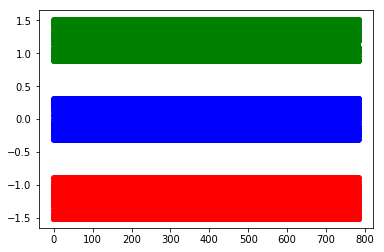

In [400]:
for i in range(0,50):
  if(y_train[i] == 0):
    plt.plot(x_train[i],'ro', label='Original data')
  if(y_train[i] == 1):
    plt.plot(x_train[i],'bo', label='Original data')    
  if(y_train[i] == 2):
    plt.plot(x_train[i],'go', label='Original data')    

In [401]:

def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.optimizers.Adam(learning_rate)

In [402]:

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
    gradients = g.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

Initiallise weight with uniform distribution

In [403]:
mu, sigma = 0, 0.1
W = tf.Variable(rng.normal(mu, sigma, (num_features,num_classes)), name="weight",dtype =tf.float32 )
b = tf.Variable(rng.normal(mu, sigma, num_classes), name="bias",dtype =tf.float32 )

Do not run below cell, its just for reference

In [404]:
# Do not run this cell, its just for reference 
#W = tf.Variable(rng.randn(num_features,num_classes), name="weight",dtype =tf.float32 )
#b = tf.Variable(rng.randn(num_classes), name="bias",dtype =tf.float32 )

In [405]:

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 0.085535, accuracy: 0.996094
step: 100, loss: 0.040109, accuracy: 1.000000
step: 150, loss: 0.025988, accuracy: 1.000000
step: 200, loss: 0.016125, accuracy: 1.000000
step: 250, loss: 0.014689, accuracy: 1.000000
step: 300, loss: 0.010176, accuracy: 1.000000
step: 350, loss: 0.007561, accuracy: 1.000000
step: 400, loss: 0.006660, accuracy: 1.000000
step: 450, loss: 0.004971, accuracy: 1.000000
step: 500, loss: 0.004583, accuracy: 1.000000
step: 550, loss: 0.004049, accuracy: 1.000000
step: 600, loss: 0.003311, accuracy: 1.000000
step: 650, loss: 0.002764, accuracy: 1.000000
step: 700, loss: 0.002600, accuracy: 1.000000
step: 750, loss: 0.002456, accuracy: 1.000000
step: 800, loss: 0.001770, accuracy: 1.000000
step: 850, loss: 0.001972, accuracy: 1.000000
step: 900, loss: 0.001640, accuracy: 1.000000
step: 950, loss: 0.001909, accuracy: 1.000000
step: 1000, loss: 0.001115, accuracy: 1.000000


In [406]:
predict = logistic_regression(x_test)


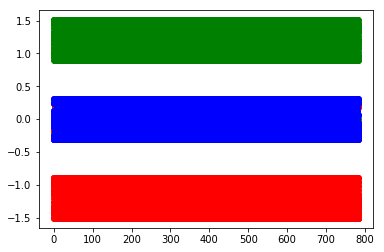

In [407]:
for i in range(0,50):

  #print(np.argmax(predict.numpy()[i]),y_train[i])

  if (np.argmax(predict.numpy()[i]) == 0):
    plt.plot(x_test[i],'ro', label='Original data')
  elif (np.argmax(predict.numpy()[i]) == 1):
    plt.plot(x_test[i],'bo', label='Original data')    
  elif (np.argmax(predict.numpy()[i]) == 2):
    plt.plot(x_test[i],'go', label='Original data')  
  else:
    plt.plot(x_test[i],'mo', label='Original data')  


